In this article, we will use Python and its different libraries to analyze the Uber Rides Data.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importing Libraries
The analysis will be done using the following libraries : 

Pandas:  This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

Numpy: Numpy arrays are very fast and can perform large computations in a very short time.

Matplotlib / Seaborn: This library is used to draw visualizations.
To importing all these libraries, we can use the  below code :



Importing Dataset


In [ ]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


To find the shape of the dataset, we can use dataset.shape



In [ ]:
dataset.shape


(1156, 7)

To understand the data more deeply, we need to know about the null values count, datatype, etc. So for that we will use the below code.



In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Data Preprocessing

As we understood that there are a lot of null values in PURPOSE column, so for that we will me filling the null values with a NOT keyword. You can try something else too.



In [ ]:
dataset['PURPOSE'].fillna("NOT", inplace=True)


Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.



In [ ]:

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
                                     errors='coerce')


Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night



In [ ]:

from datetime import datetime
 
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour
 
#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])


In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


Once we are done with creating new columns, we can now drop rows with null values.



In [ ]:
dataset.dropna(inplace=True)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1136 non-null   datetime64[ns]
 1   END_DATE    1136 non-null   datetime64[ns]
 2   CATEGORY    1136 non-null   object        
 3   START       1136 non-null   object        
 4   STOP        1136 non-null   object        
 5   MILES       1136 non-null   float64       
 6   PURPOSE     1136 non-null   object        
 7   date        1136 non-null   object        
 8   time        1136 non-null   float64       
 9   day-night   1136 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 90.1+ KB


It is also important to drop the duplicates rows from the dataset. To do that, refer the code below.



In [ ]:
dataset.drop_duplicates(inplace=True)


In [ ]:
dataset.shape

(1135, 10)

In [ ]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values




{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

Data Visualization

In this section, we will try to understand and compare all columns.

Let’s start with checking the unique values in dataset of the columns with object datatype.



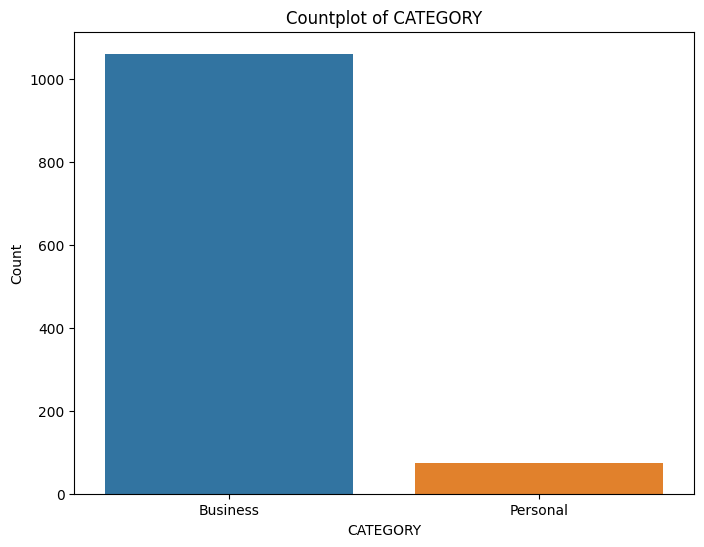

In [ ]:

# Countplot for 'CATEGORY' column
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='CATEGORY')
plt.title('Countplot of CATEGORY')
plt.xlabel('CATEGORY')
plt.ylabel('Count')
plt.show()



Now, we will be using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns.



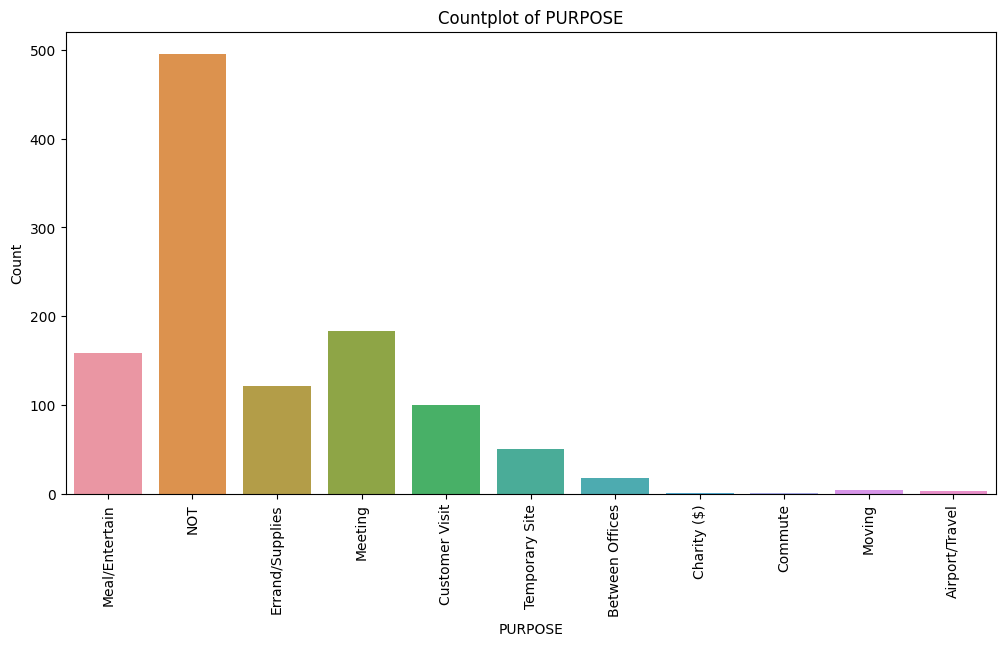

In [ ]:
# Countplot for 'PURPOSE' column
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='PURPOSE')
plt.title('Countplot of PURPOSE')
plt.xlabel('PURPOSE')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


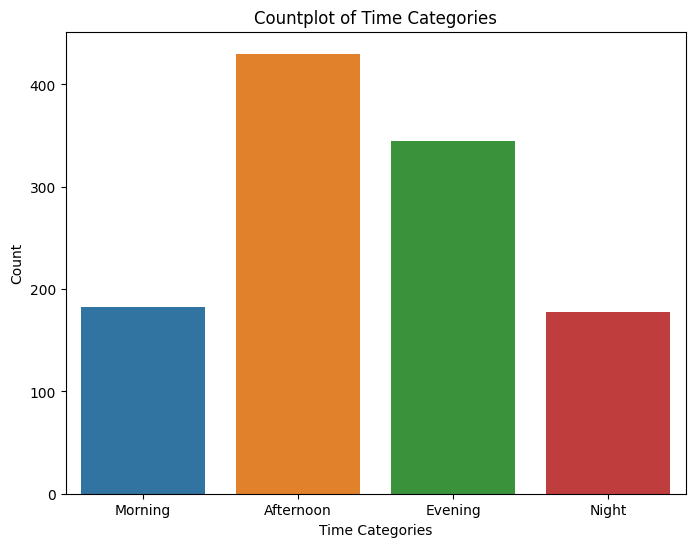

In [ ]:

plt.figure(figsize=(8, 6))

sns.countplot(data=dataset, x='day-night')
plt.title('Countplot of Time Categories')
plt.xlabel('Time Categories')
plt.ylabel('Count')

plt.show()


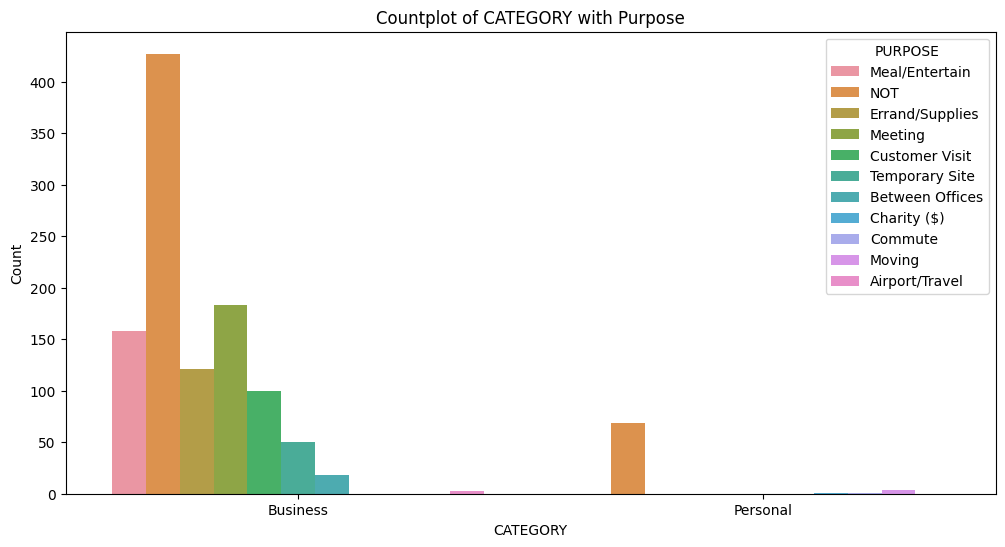

In [ ]:

plt.figure(figsize=(12, 6))

sns.countplot(data=dataset, x='CATEGORY', hue='PURPOSE')
plt.title('Countplot of CATEGORY with Purpose')
plt.xlabel('CATEGORY')
plt.ylabel('Count')

plt.legend(title='PURPOSE', loc='upper right')

plt.show()


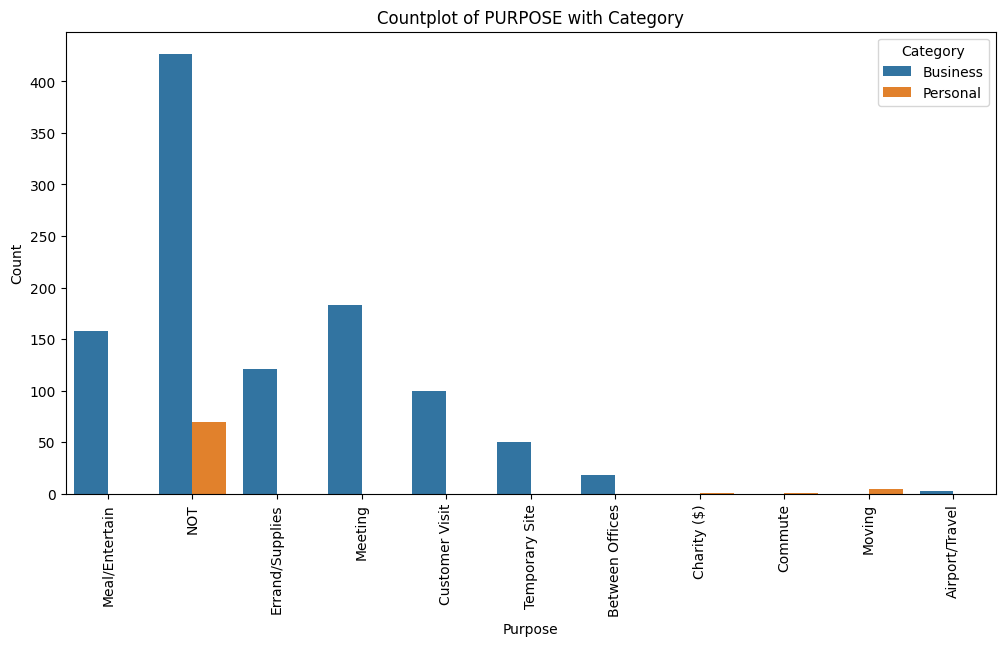

In [ ]:

plt.figure(figsize=(12, 6))

sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.title('Countplot of PURPOSE with Category')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Category', loc='upper right')

plt.show()


Insights from the above count-plots : 

Most of the rides are booked for business purpose.

Most of the people book cabs for Meetings and Meal / Entertain purpose.

Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).


As we have seen that CATEGORY and PURPOSE columns are two very important columns. So now we will be using OneHotEncoder to categories them.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']

# Create an instance of the OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding to the specified columns
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))

# Set the index of OH_cols to match the dataset index
OH_cols.index = dataset.index

# Get the unique category values for each column
categories = OH_encoder.categories_
category_names = [f"{col}_{cat}" for col, cats in zip(object_cols, categories) for cat in cats]

# Set the column names of OH_cols using the category names
OH_cols.columns = category_names

# Drop the original object columns from the dataset
df_final = dataset.drop(object_cols, axis=1)

# Concatenate the one-hot encoded columns with the remaining dataset columns
dataset = pd.concat([df_final, OH_cols], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


After that, we can now find the correlation between the columns using heatmap.



In [ ]:
dataset.head()

,START_DATE,END_DATE,START,STOP,MILES,date,time,day-night,CATEGORY_Business,CATEGORY_Personal,...,PURPOSE_Between Offices,PURPOSE_Charity ($),PURPOSE_Commute,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_NOT,PURPOSE_Temporary Site
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-01-02,1.0,Morning,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-01-02,20.0,Night,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-01-05,17.0,Evening,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-01-06,14.0,Afternoon,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<ipython-input-41-9f61677ebc56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

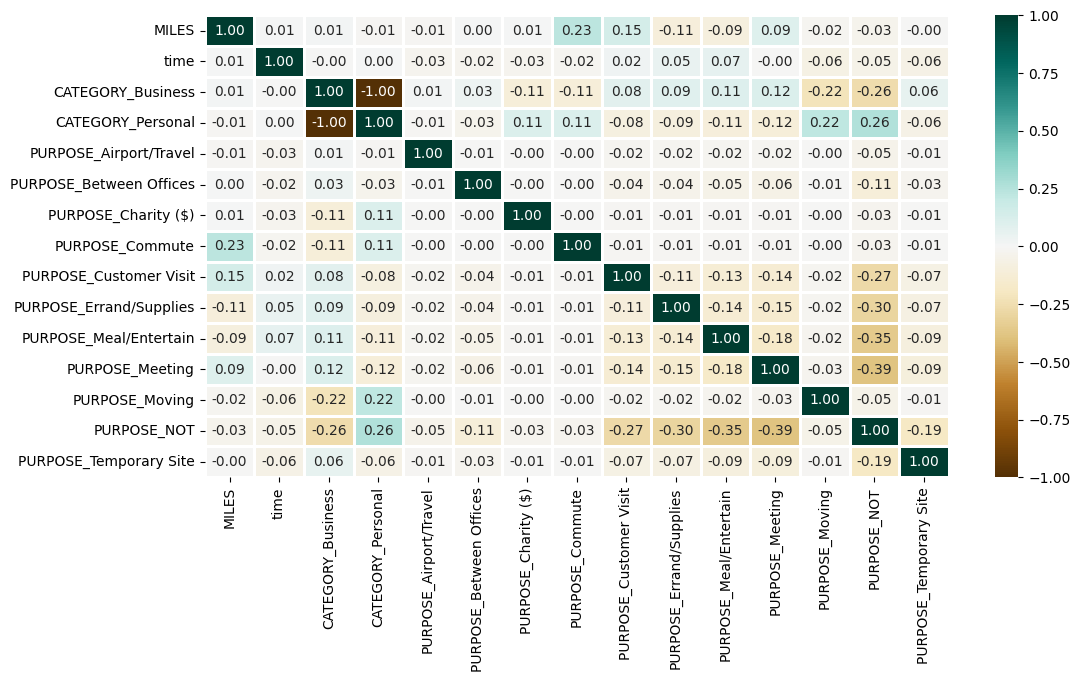

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)


Insights from the heatmap:

Business and Personal Category are highly negatively correlated, this have already proven earlier. 
So this plot, justifies the above conclusions.
There is not much correlation between the features.

Now, as we need to visualize the month data. This can we same as done before (for hours). 



[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

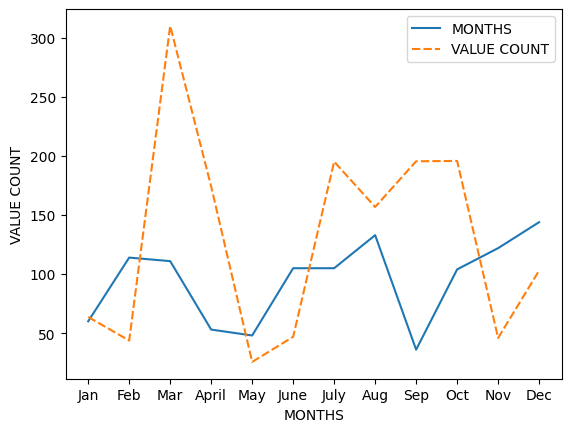

In [ ]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": dataset.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


Insights from the above plot : 

The counts are very irregular.

Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.


Visualization for days data.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

# Calculate the total rides count per month
total_rides_per_month = dataset['MONTH'].value_counts().sort_index()

# Calculate the maximum value count of the 'MILES' column per month
max_miles_per_month = dataset.groupby('MONTH')['MILES'].max()



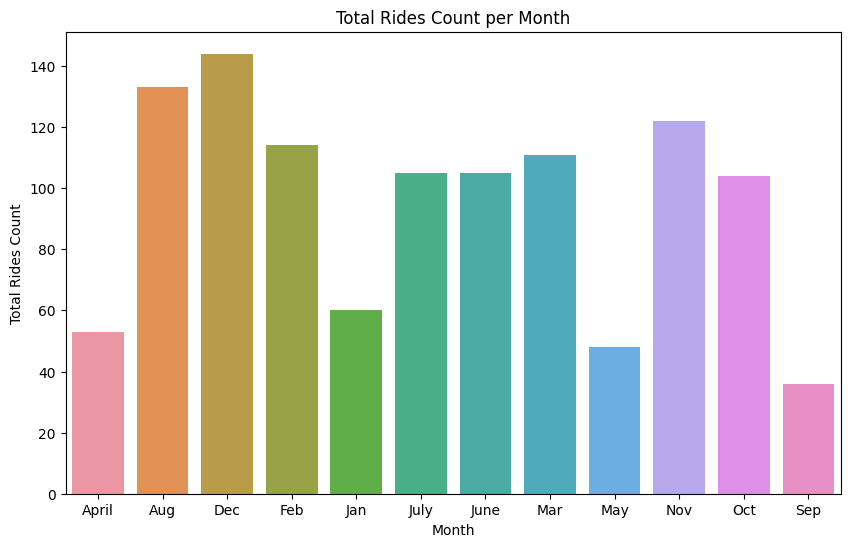

In [ ]:
# Create a bar plot for the total rides count per month
plt.figure(figsize=(10, 6))
sns.barplot(x=total_rides_per_month.index, y=total_rides_per_month.values)
plt.xlabel('Month')
plt.ylabel('Total Rides Count')
plt.title('Total Rides Count per Month')
plt.show()



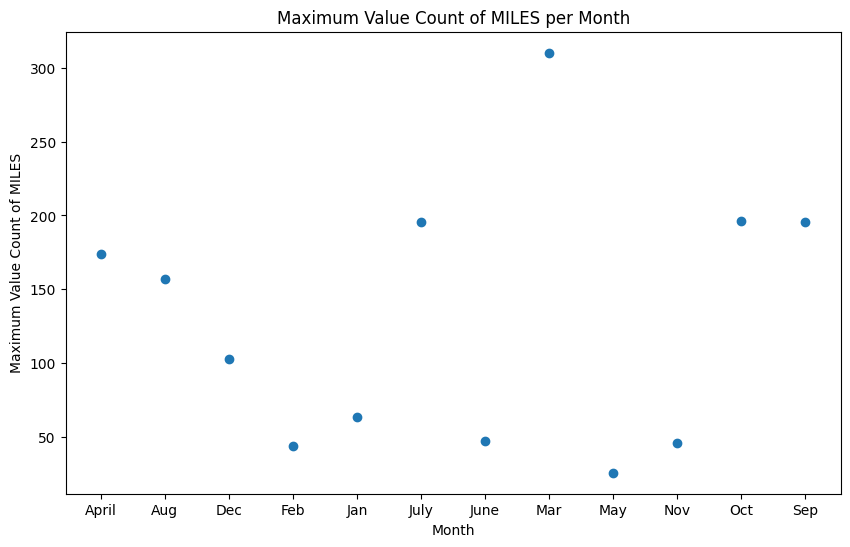

In [ ]:
# Create a scatter plot for the maximum value count of 'MILES' per month
plt.figure(figsize=(10, 6))
plt.scatter(x=max_miles_per_month.index, y=max_miles_per_month.values)
plt.xlabel('Month')
plt.ylabel('Maximum Value Count of MILES')
plt.title('Maximum Value Count of MILES per Month')
plt.show()


In [ ]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)


Text(0, 0.5, 'COUNT')

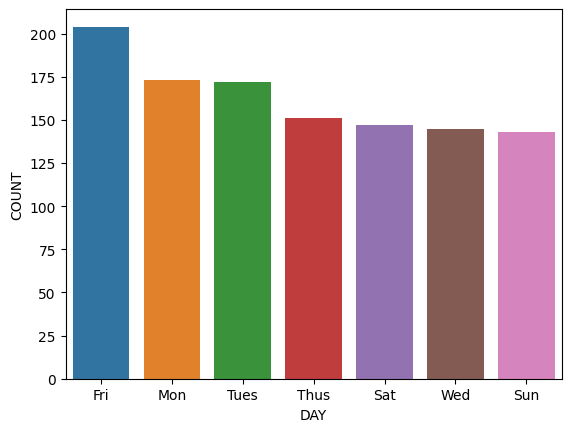

In [ ]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


Now, let’s explore the MILES Column .




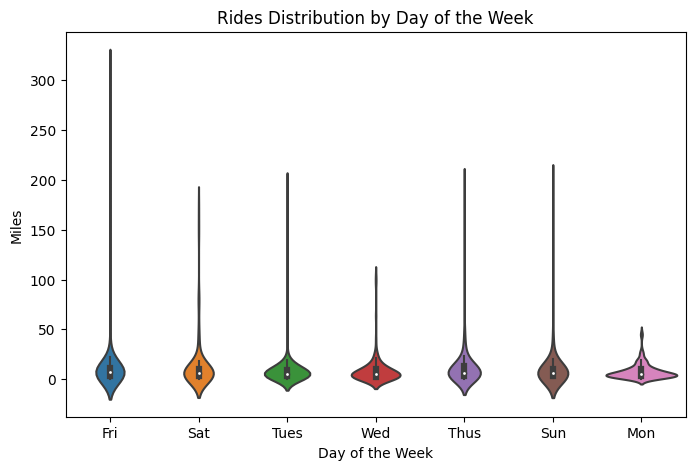

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=dataset['DAY'], y=dataset['MILES'])
plt.xlabel('Day of the Week')
plt.ylabel('Miles')
plt.title('Rides Distribution by Day of the Week')
plt.show()


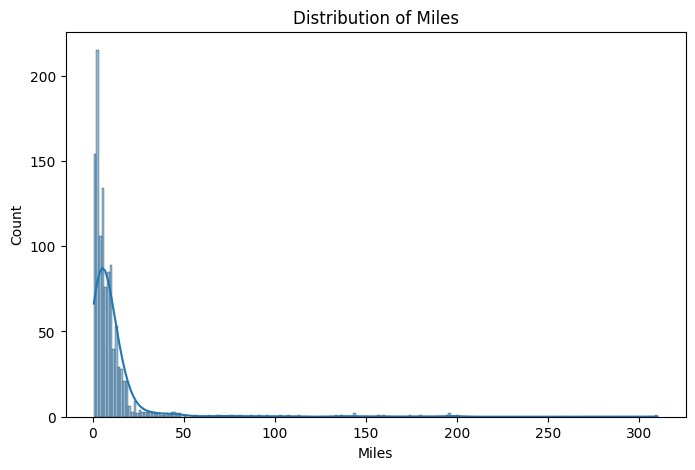

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset['MILES'], kde=True)
plt.xlabel('Miles')
plt.ylabel('Count')
plt.title('Distribution of Miles')
plt.show()


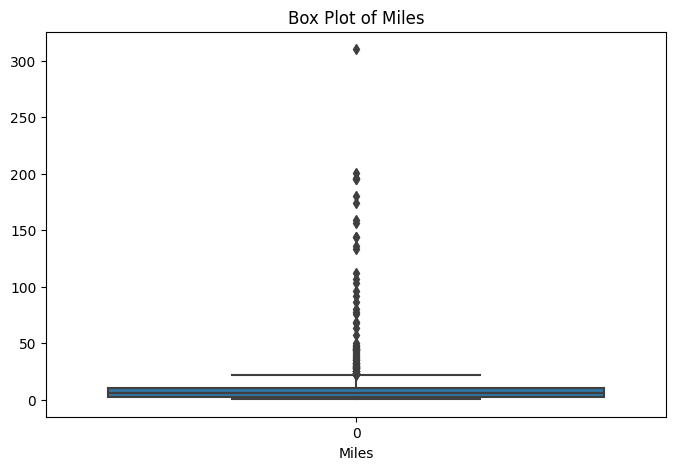

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(dataset['MILES'])
plt.xlabel('Miles')
plt.title('Box Plot of Miles')
plt.show()


Insights from the above plots :
Most of the cabs booked for the distance of 4-5 miles.
Majorly people chooses cabs for the distance of 0-20 miles.
For distance more than 20 miles cab counts is nearly negligible.


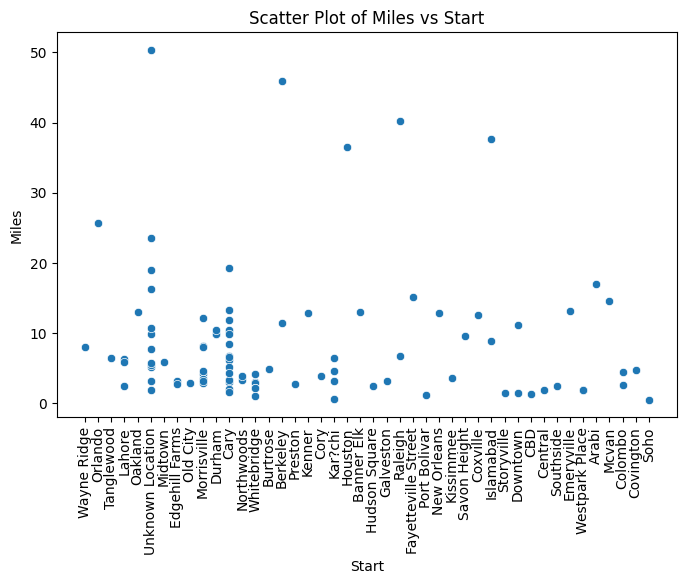

In [ ]:
sampled_data = dataset.sample(n=100)  # Select 100 random data points
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_data['START'], y=sampled_data['MILES'])
plt.xlabel('Start')
plt.ylabel('Miles')
plt.title('Scatter Plot of Miles vs Start')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()


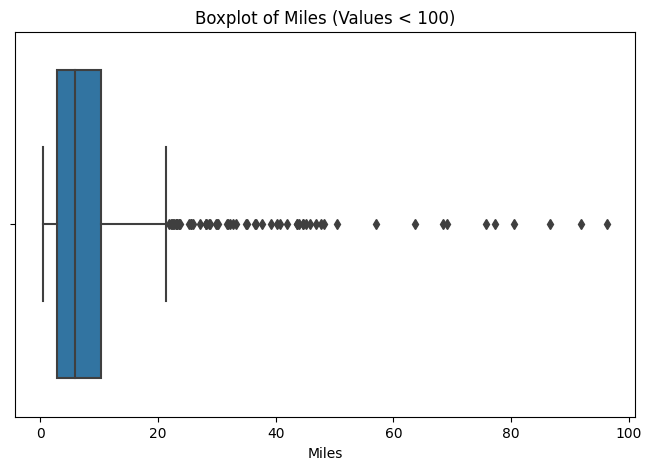

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset[dataset['MILES'] < 100], x='MILES')
plt.xlabel('Miles')
plt.title('Boxplot of Miles (Values < 100)')
plt.show()


<ipython-input-75-1b5eda3a62cb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES'] < 40]['MILES'])


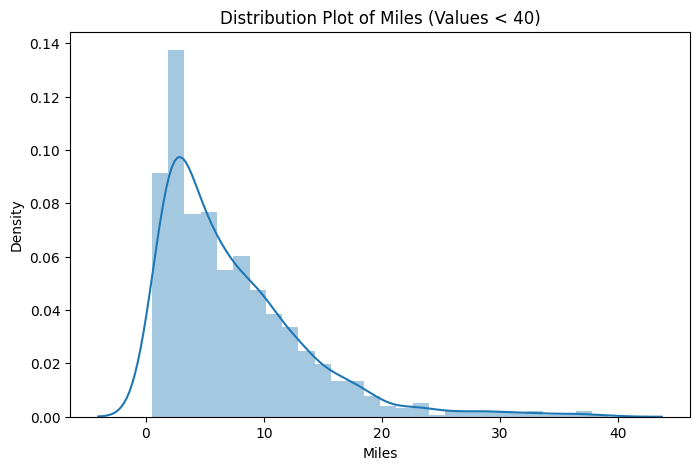

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(dataset[dataset['MILES'] < 40]['MILES'])
plt.xlabel('Miles')
plt.title('Distribution Plot of Miles (Values < 40)')
plt.show()
